In [3]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import json
import requests
import time
from citipy import citipy
from resources import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [25]:
# cities = ["Paris", "London", "Oslo", "Beijing"]

In [12]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + api_key + "&q="
response = requests.get(query_url + city + "&units=" + "imperial").json()

#test output to see API structure
#API day 3, activity 4
# test_url = query_url + "London"
# print(test_url)

In [13]:
#Perform a weather check on each of the cities using a series of successive API calls.
#API day 3, activity 4
#API Unit Day 2, Activity 5

# set up lists to hold reponse info
city_clean = []
number = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []

print('Beginning Data Retrieval')
loop_counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    loop_counter = loop_counter + 1

    try:
        #assemble url and make API request
        response = requests.get(query_url + city + "&units=" + "imperial").json()
        
        #check for complete data
        lat_temp = response["coord"]["lat"]
        lon_temp = response["coord"]["lon"]
        temp_temp = response['main']['temp']
        humid_temp = response["main"]['humidity']
        cloud_temp = response['clouds']['all']
        wind_temp = response['wind']['speed']
        
        #add data to lists
        lat.append(lat_temp)
        lon.append(lon_temp)
        temp.append(temp_temp)
        humid.append(humid_temp)
        cloud.append(cloud_temp)
        wind.append(wind_temp)
        city_clean.append(city)
        
        print(f'Processing Record {loop_counter} | {city}')
        
    except (KeyError):
        print("City not found. Skipping...")
        
    print("------------")

Beginning Data Retrieval
Processing Record 1 | tautira
------------
Processing Record 2 | busselton
------------
Processing Record 3 | kapaa
------------
Processing Record 4 | riohacha
------------
Processing Record 5 | kathu
------------
Processing Record 6 | yellowknife
------------
Processing Record 7 | whitehorse
------------
Processing Record 8 | ahipara
------------
Processing Record 9 | norman wells
------------
Processing Record 10 | georgetown
------------
Processing Record 11 | mataura
------------
Processing Record 12 | kampene
------------
Processing Record 13 | ponta do sol
------------
Processing Record 14 | karlstad
------------
Processing Record 15 | yaan
------------
Processing Record 16 | longyearbyen
------------
Processing Record 17 | vaini
------------
Processing Record 18 | hasaki
------------
City not found. Skipping...
------------
Processing Record 20 | chuy
------------
Processing Record 21 | fatehpur
------------
Processing Record 22 | bluff
------------
Proc

Processing Record 182 | saskylakh
------------
Processing Record 183 | aksu
------------
City not found. Skipping...
------------
Processing Record 185 | namatanai
------------
Processing Record 186 | antalaha
------------
City not found. Skipping...
------------
Processing Record 188 | cherskiy
------------
Processing Record 189 | biak
------------
City not found. Skipping...
------------
Processing Record 191 | oyama
------------
Processing Record 192 | qujing
------------
Processing Record 193 | san jeronimo
------------
Processing Record 194 | atar
------------
Processing Record 195 | macherla
------------
Processing Record 196 | qui nhon
------------
Processing Record 197 | gat
------------
City not found. Skipping...
------------
Processing Record 199 | luanda
------------
Processing Record 200 | bethel
------------
Processing Record 201 | talnakh
------------
Processing Record 202 | walvis bay
------------
Processing Record 203 | nizwa
------------
Processing Record 204 | kununu

Processing Record 364 | zolotepec
------------
Processing Record 365 | krymsk
------------
Processing Record 366 | muisne
------------
Processing Record 367 | bremerton
------------
Processing Record 368 | vila velha
------------
Processing Record 369 | fort walton beach
------------
Processing Record 370 | coquimbo
------------
Processing Record 371 | suileng
------------
Processing Record 372 | aquin
------------
Processing Record 373 | tuatapere
------------
Processing Record 374 | chandler
------------
Processing Record 375 | mar del plata
------------
Processing Record 376 | vytegra
------------
City not found. Skipping...
------------
Processing Record 378 | tau
------------
Processing Record 379 | leshukonskoye
------------
City not found. Skipping...
------------
Processing Record 381 | newtyle
------------
Processing Record 382 | korla
------------
Processing Record 383 | oskarshamn
------------
Processing Record 384 | moramanga
------------
Processing Record 385 | serov
-----

Processing Record 544 | karratha
------------
Processing Record 545 | qasigiannguit
------------
Processing Record 546 | panguipulli
------------
City not found. Skipping...
------------
Processing Record 548 | ormara
------------
Processing Record 549 | matagami
------------
Processing Record 550 | high level
------------
City not found. Skipping...
------------
Processing Record 552 | nador
------------
Processing Record 553 | aden
------------
Processing Record 554 | nenjiang
------------
Processing Record 555 | muroto
------------
Processing Record 556 | snezhnogorsk
------------
City not found. Skipping...
------------
Processing Record 558 | chalmette
------------
City not found. Skipping...
------------
Processing Record 560 | charters towers
------------
Processing Record 561 | baie-comeau
------------
Processing Record 562 | puri
------------
Processing Record 563 | bereda
------------
Processing Record 564 | gondanglegi
------------
Processing Record 565 | surt
------------
C

In [15]:
# create a data frame from lists
weather_dict = {
    "city": city_clean,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humid,
    "cloudiness": cloud,
    "wind speed": wind
}

#Confirm lengths
[len(weather_dict[x]) for x in weather_dict]

[558, 558, 558, 558, 558, 558, 558]

In [20]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lon,temp,humidity,cloudiness,wind speed
0,tautira,-17.73,-149.15,84.20,54,20,2.24
1,busselton,-33.65,115.33,58.32,47,11,11.70
2,kapaa,22.08,-159.32,82.58,66,75,12.75
3,riohacha,11.54,-72.91,82.51,78,3,11.92
4,kathu,7.92,98.33,81.05,94,75,3.36


In [56]:
#output city data to file
weather_data.to_csv(output_data_file, index=False)

In [22]:
weather_data.describe()

,lat,lon,temp,humidity,cloudiness,wind speed
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,20.137258,20.243495,67.599050,71.716846,52.066308,8.234785
std,33.272626,92.379257,14.560347,19.721638,38.253913,5.707793
min,-54.800000,-179.170000,30.090000,9.000000,0.000000,0.270000
25%,-6.465000,-63.505000,55.592500,62.000000,9.000000,4.000000
50%,24.255000,25.985000,69.170000,75.500000,56.500000,6.930000
75%,48.307500,106.265000,80.595000,87.000000,90.000000,11.232500
max,78.220000,179.320000,101.770000,100.000000,100.000000,34.140000


In [25]:
humid_check = weather_data.loc[(weather_data["humidity"] > 100 )]
humid_check

,city,lat,lon,temp,humidity,cloudiness,wind speed


In [ ]:
#no cities have humidity >100%, so no need to remove any cities

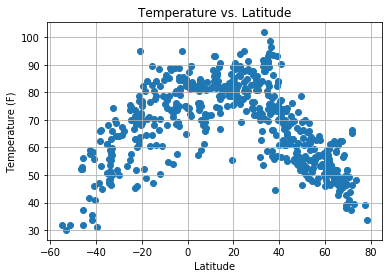

In [52]:
# Build a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempVsLatScatter.png")

In [33]:
#observations

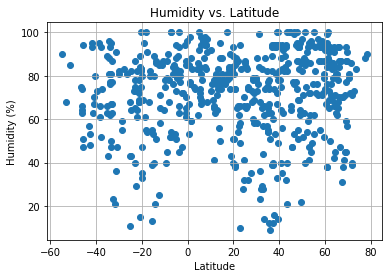

In [53]:
# Build a scatter plot for Humidity (%) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidVsLatScatter.png")

In [35]:
#observations

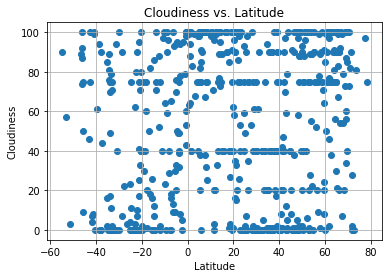

In [54]:
# Build a scatter plot for Cloudiness (%) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudVsLatScatter.png")

In [37]:
#observations

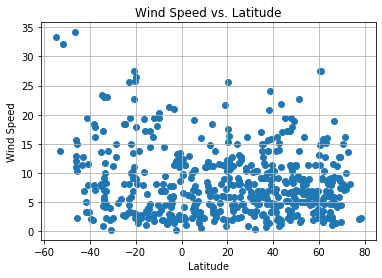

In [55]:
# Build a scatter plot for Wind Speed vs. Latitude
plt.scatter(weather_data["lat"], weather_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindVsLatScatter.png")

In [39]:
#observations

<function matplotlib.pyplot.show(*args, **kw)>

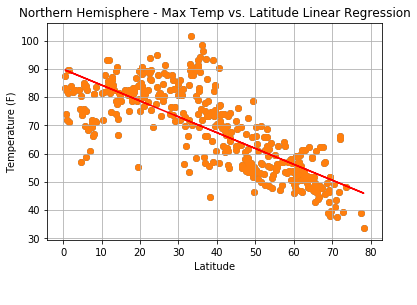

In [39]:
#Run linear regression on each relationship, only this time separating them into Northern Hemisphere 
#(greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
#Matplotlib Unit Day 3, Activity 8
# Northern Hemisphere - Temperature (F) vs. Latitude
#create Northern Hemisphere dataframe
weather_data_north = weather_data.loc[weather_data["lat"] >= 0]

#build scatter plot
plt.scatter(weather_data_north["lat"], weather_data_north["temp"], marker="o")

#add linear regression (make var names unique)
temp_lat_n_x_values = weather_data_north['lat']
temp_lat_n_y_values = weather_data_north['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(temp_lat_n_x_values, temp_lat_n_y_values)
temp_lat_n_regress_values = temp_lat_n_x_values * slope + intercept
temp_lat_n_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(temp_lat_n_x_values,temp_lat_n_y_values)
plt.plot(temp_lat_n_x_values,temp_lat_n_regress_values,"r-")
plt.annotate(temp_lat_n_line_eq,(6,10),fontsize=15)

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempVsLatRegressNorth.png")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

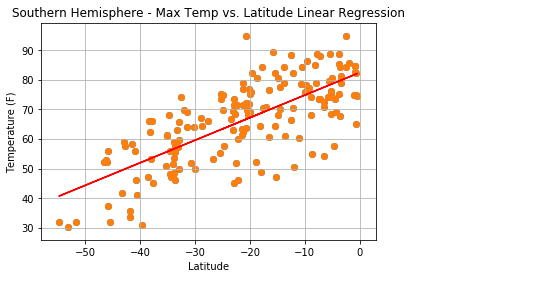

In [41]:
# Southern Hemisphere - Temperature (F) vs. Latitude
#(greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
#Matplotlib Unit Day 3, Activity 8
#create Southern Hemisphere dataframe
weather_data_south = weather_data.loc[weather_data["lat"] < 0]

#build scatter plot
plt.scatter(weather_data_south["lat"], weather_data_south["temp"], marker="o")

#add linear regression
temp_lat_s_x_values = weather_data_south['lat']
temp_lat_s_y_values = weather_data_south['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(temp_lat_s_x_values, temp_lat_s_y_values)
temp_lat_s_regress_values = temp_lat_s_x_values * slope + intercept
temp_lat_s_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(temp_lat_s_x_values,temp_lat_s_y_values)
plt.plot(temp_lat_s_x_values,temp_lat_s_regress_values,"r-")
plt.annotate(temp_lat_s_line_eq,(6,10),fontsize=15)

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempVsLatRegressSouth.png")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

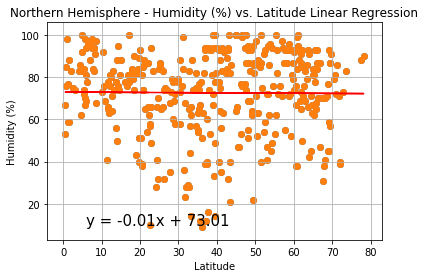

In [45]:
# Northern Hemisphere - Humidity (%) vs. Latitude
#build scatter plot
plt.scatter(weather_data_north["lat"], weather_data_north["humidity"], marker="o")

#add linear regression (make var names unique)
humid_lat_n_x_values = weather_data_north['lat']
humid_lat_n_y_values = weather_data_north['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(humid_lat_n_x_values, humid_lat_n_y_values)
humid_lat_n_regress_values = humid_lat_n_x_values * slope + intercept
humid_lat_n_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(humid_lat_n_x_values,humid_lat_n_y_values)
plt.plot(humid_lat_n_x_values,humid_lat_n_regress_values,"r-")
plt.annotate(humid_lat_n_line_eq,(6,10),fontsize=15)

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidVsLatRegressNorth.png")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

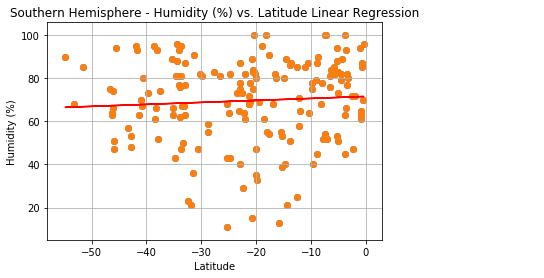

In [46]:
# Southern Hemisphere - Humidity (%) vs. Latitude
#build scatter plot
plt.scatter(weather_data_south["lat"], weather_data_south["humidity"], marker="o")

#add linear regression (make var names unique)
humid_lat_s_x_values = weather_data_south['lat']
humid_lat_s_y_values = weather_data_south['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(humid_lat_s_x_values, humid_lat_s_y_values)
humid_lat_s_regress_values = humid_lat_s_x_values * slope + intercept
humid_lat_s_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(humid_lat_s_x_values,humid_lat_s_y_values)
plt.plot(humid_lat_s_x_values,humid_lat_s_regress_values,"r-")
plt.annotate(humid_lat_s_line_eq,(6,10),fontsize=15)

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidVsLatRegressSouth.png")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

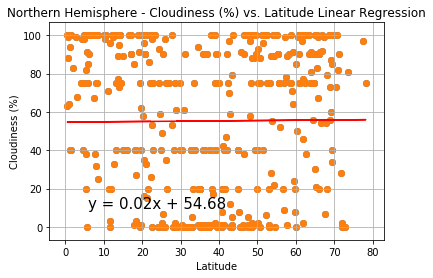

In [47]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
#build scatter plot
plt.scatter(weather_data_north["lat"], weather_data_north["cloudiness"], marker="o")

#add linear regression (make var names unique)
cloud_lat_n_x_values = weather_data_north['lat']
cloud_lat_n_y_values = weather_data_north['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloud_lat_n_x_values, cloud_lat_n_y_values)
cloud_lat_n_regress_values = cloud_lat_n_x_values * slope + intercept
cloud_lat_n_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cloud_lat_n_x_values,cloud_lat_n_y_values)
plt.plot(cloud_lat_n_x_values,cloud_lat_n_regress_values,"r-")
plt.annotate(cloud_lat_n_line_eq,(6,10),fontsize=15)

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudVsLatRegressNorth.png")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

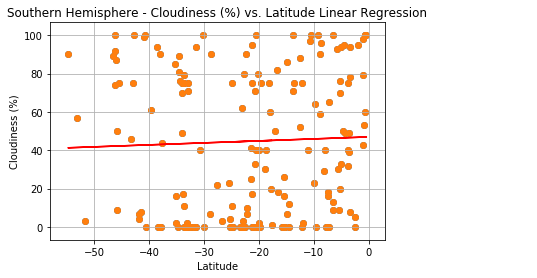

In [49]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
#build scatter plot
plt.scatter(weather_data_south["lat"], weather_data_south["cloudiness"], marker="o")

#add linear regression (make var names unique)
cloud_lat_s_x_values = weather_data_south['lat']
cloud_lat_s_y_values = weather_data_south['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloud_lat_s_x_values, cloud_lat_s_y_values)
cloud_lat_s_regress_values = cloud_lat_s_x_values * slope + intercept
cloud_lat_s_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cloud_lat_s_x_values,cloud_lat_s_y_values)
plt.plot(cloud_lat_s_x_values,cloud_lat_s_regress_values,"r-")
plt.annotate(cloud_lat_s_line_eq,(6,10),fontsize=15)

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudVsLatRegressSouth.png")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

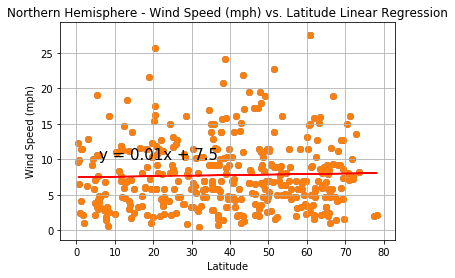

In [50]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
#build scatter plot
plt.scatter(weather_data_north["lat"], weather_data_north["wind speed"], marker="o")

#add linear regression (make var names unique)
wind_lat_n_x_values = weather_data_north['lat']
wind_lat_n_y_values = weather_data_north['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(wind_lat_n_x_values, wind_lat_n_y_values)
wind_lat_n_regress_values = wind_lat_n_x_values * slope + intercept
wind_lat_n_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(wind_lat_n_x_values,wind_lat_n_y_values)
plt.plot(wind_lat_n_x_values,wind_lat_n_regress_values,"r-")
plt.annotate(wind_lat_n_line_eq,(6,10),fontsize=15)

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindVsLatRegressNorth.png")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

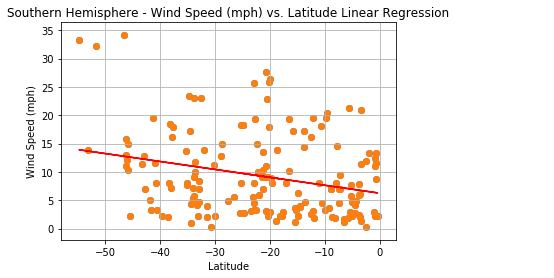

In [51]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
#build scatter plot
plt.scatter(weather_data_south["lat"], weather_data_south["wind speed"], marker="o")

#add linear regression (make var names unique)
wind_lat_s_x_values = weather_data_south['lat']
wind_lat_s_y_values = weather_data_south['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(wind_lat_s_x_values, wind_lat_s_y_values)
wind_lat_s_regress_values = wind_lat_s_x_values * slope + intercept
wind_lat_s_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(wind_lat_s_x_values,wind_lat_s_y_values)
plt.plot(wind_lat_s_x_values,wind_lat_s_regress_values,"r-")
plt.annotate(wind_lat_s_line_eq,(6,10),fontsize=15)

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindVsLatRegressSouth.png")

plt.show